# Linear Regression Using Gradient Decent

## Importing libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

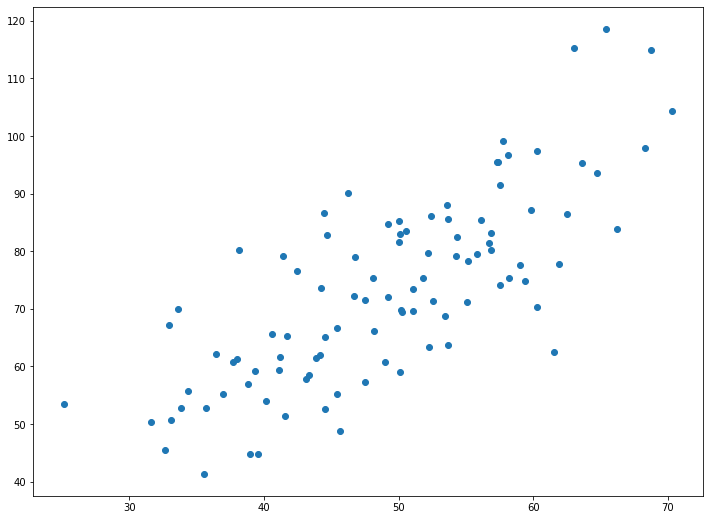

In [30]:
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [31]:
# Building the model
m = 0
c = 0

L = 0.000001  # The learning Rate
epochs = 100000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.4796491740442699 0.10148095201916117


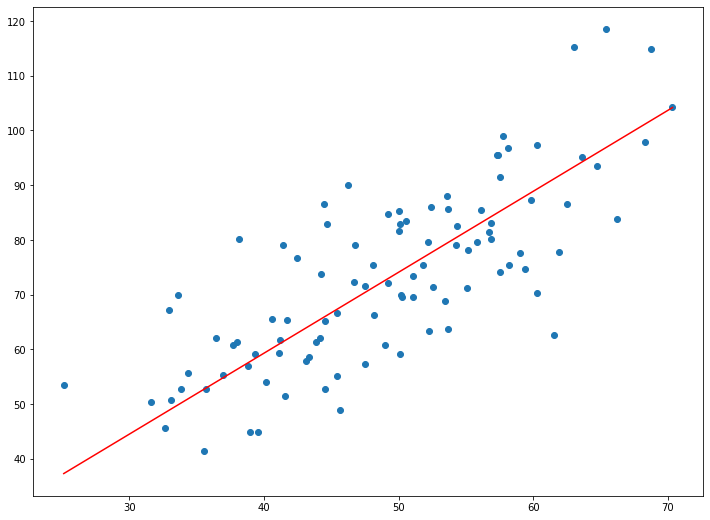

In [32]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

## Calculating Root mean square Error

In [33]:
s=len(X)
rmse = 0
for i in range(s):
    y_pred=  c + m* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

10.536172778229899


## Calculating R^2 error

In [34]:
x_mean = np.mean(X)
y_mean = np.mean(Y)
sumofsquares = 0
sumofresiduals = 0
for i in range(s) :
    y_pred = c + m * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.5735604038999972


# Comparing results with Scikit library


In [35]:
from sklearn import linear_model
X = np.array(X).reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit (X, Y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

from sklearn.metrics import r2_score
test_y_hat = regr.predict(X)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - Y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , Y) )

Coefficients:  [1.28735737]
Intercept:  9.908606190326537
Mean absolute error: 8.22
Residual sum of squares (MSE): 107.47
R2-score: 0.30
